# Overfitting & Regularization

- IMBD 를 이용하여 overfitting 과 regularization test

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
NUM_WORDS = 10000

(train_data, train_label), (test_data, test_label) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

print(train_data.shape)
print(test_data.shape)
print(train_label.shape)
print(test_label.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [3]:
print(train_data[0])
print()
print(train_label[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

1


다음의 요령으로 train_data, test_data 를 **multi_hot_encoding** 한다.

In [59]:
test = np.zeros((2,10))
test[0, [1,2,3]] = 1
test[1, [5,6,7]] = 1
print(test)

[[0. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0.]]


In [60]:
def multi_hot_sequences(sequences, dimensions):
    results = np.zeros((len(sequences), dimensions))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
        return results

In [61]:
X_train = multi_hot_sequences(train_data, NUM_WORDS)
X_test  = multi_hot_sequences(test_data, NUM_WORDS)

original data (multi-hot-encoding 전)

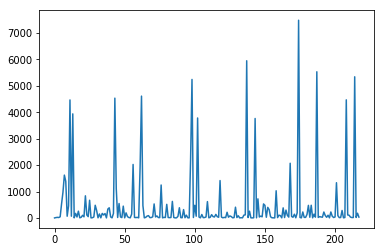

In [62]:
plt.plot(train_data[0])

multi-hot-encoding 후

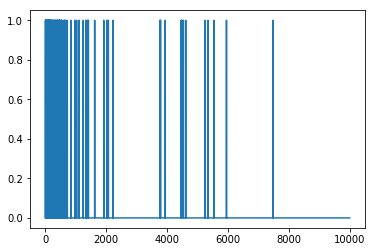

In [63]:
plt.plot(X_train[0])

## 3 가지 크기의 model 을 만들어 underfitting, overfitting 을 비교

- metrics = ['accuracy', 'binary_crossentropy'] 로 주고 history.histroy['val_binary_crossentropy'] 를 서로 비교한다.

In [64]:
def make_model(neurons, regularizer=None, dropout=0.0):
    model = keras.Sequential()
    model.add(Dense(neurons, kernel_regularizer=regularizer, activation="relu", input_shape=(NUM_WORDS,)))
    model.add(Dropout(dropout))
    model.add(Dense(neurons, kernel_regularizer=regularizer, activation="relu"))
    model.add(Dropout(dropout))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])
    return model

In [68]:
regularizer = None
dropout = 0.0                                     

model_1 = make_model(16, regularizer, dropout)
model_2 = make_model(4, regularizer, dropout)
model_3 = make_model(512, regularizer, dropout)

In [ ]:
history1 = model_1.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)
history2 = model_2.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)
history3 = model_3.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)

### 한 figure 에 model_1,2,3 를 모두 그리고, 각각의 train / validation loss 를 같은 색으로 그린다.

- history.epoch : epoch 수  
 
 
- history.history['binary_crossentropy'] : train loss  


- history.history['val_binary_crossentropy'] : validation loss  


- plt.plot return value 의 get_color() 를 이용해 같은 색으로 그릴 수 있다

In [ ]:
history.history

(0, 19)

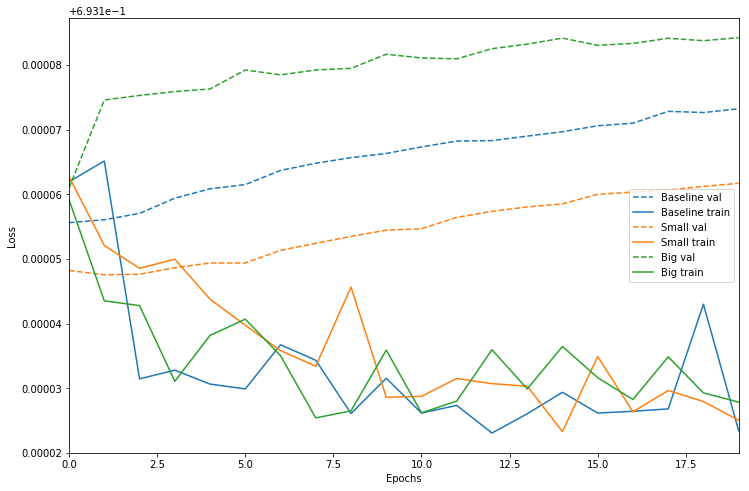

In [95]:
plt.figure(figsize=(12, 8))
for name, history in [('baseline', history1), ('small', history2), ('big', history3)]:
    val = plt.plot(history.epoch, history.history['val_loss'], '--', label=name.title()+' val')
    plt.plot(history.epoch, history.history['loss'], color=val[0].get_color(), label=name.title()+' train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0, max(history.epoch)])

## l2 regularization 을 적용하여 같은 Test

In [96]:
regularizer = keras.regularizers.l2(0.001)
dropout = 0.0                                     

model_1 = make_model(16, regularizer, dropout)
model_2 = make_model(4, regularizer, dropout)
model_3 = make_model(512, regularizer, dropout)

In [ ]:
history1 = model_1.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)
history2 = model_2.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)
history3 = model_3.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)

(0, 19)

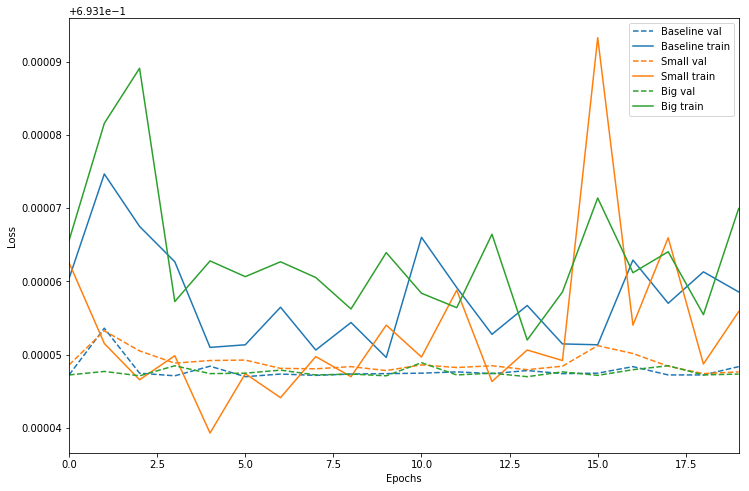

In [98]:
plt.figure(figsize=(12, 8))
for name, history in [('baseline', history1), ('small', history2), ('big', history3)]:
    val = plt.plot(history.epoch, history.history['val_binary_crossentropy'], '--', label=name.title()+' val')
    plt.plot(history.epoch, history.history['binary_crossentropy'], color=val[0].get_color(), label=name.title()+' train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0, max(history.epoch)])

## Dropout 을 적용하여 같은 Test

In [ ]:
regularizer = None
dropout = 0.5                                     

model_1 = make_model(16, regularizer, dropout)
model_2 = make_model(4, regularizer, dropout)
model_3 = make_model(512, regularizer, dropout)

history1 = model_1.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)
history2 = model_2.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)
history3 = model_3.fit(X_train, train_label, epochs=20, batch_size=512, validation_data=(X_test, test_label), verbose=1)

plt.figure(figsize=(12, 8))
for name, history in [('baseline', history1), ('small', history2), ('big', history3)]:
    val = plt.plot(history.epoch, history.history['val_binary_crossentropy'], '--', label=name.title()+' val')
    plt.plot(history.epoch, history.history['binary_crossentropy'], color=val[0].get_color(), label=name.title()+' train')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0, max(history.epoch)])